In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [22]:
df = pd.read_csv("spotify.csv")

In [26]:
df.sample(3)

,Artist,Track Name,Popularity,Duration (ms),Track ID
112,Cardi B,Bongos (feat. Megan Thee Stallion),78,175099,4YQImHflXSiIMXntcwPkx8
367,Leslie Odom Jr.,Guns and Ships,69,127578,7m9XR7FquXLP1FewdAcNS9
179,Young Thug,The London (feat. J. Cole & Travis Scott),69,200186,3s4mrPrEFFPF0LmAfutW0n


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         440 non-null    object
 1   Track Name     440 non-null    object
 2   Popularity     440 non-null    int64 
 3   Duration (ms)  440 non-null    int64 
 4   Track ID       440 non-null    object
dtypes: int64(2), object(3)
memory usage: 17.3+ KB


In [ ]:
#1 Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful

In [32]:
# Check for null values
null_values = df.isnull().sum()

# Print the null values
print("\nNull Values in Each Column:")
print(null_values)

# Drop rows with null values
df = df.dropna()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

# Print the number of duplicate rows
print("\nNumber of Duplicate Rows:")
print(duplicate_rows)

# Drop duplicate rows
df = df.drop_duplicates()

# Display the cleaned DataFrame
print("\nCleaned DataFrame:")
print(df.head())



Null Values in Each Column:
Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Number of Duplicate Rows:
27

Cleaned DataFrame:
  Artist                               Track Name  Popularity  Duration (ms)  \
0  Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)          92         319191   
1  Drake                                One Dance          91         173986   
2  Drake                       IDGAF (feat. Yeat)          90         260111   
3  Drake     First Person Shooter (feat. J. Cole)          88         247444   
4  Drake            Jimmy Cooks (feat. 21 Savage)          88         218364   

                 Track ID  
0  1yeB8MUNeLo9Ek1UEpsyz6  
1  1zi7xx7UVEFkmKfv06H8x0  
2  2YSzYUF3jWqb9YP9VXmpjE  
3  7aqfrAY2p9BUSiupwk3svU  
4  3F5CgOj3wFlRv51JsHbxhe  


In [ ]:
#2 What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram

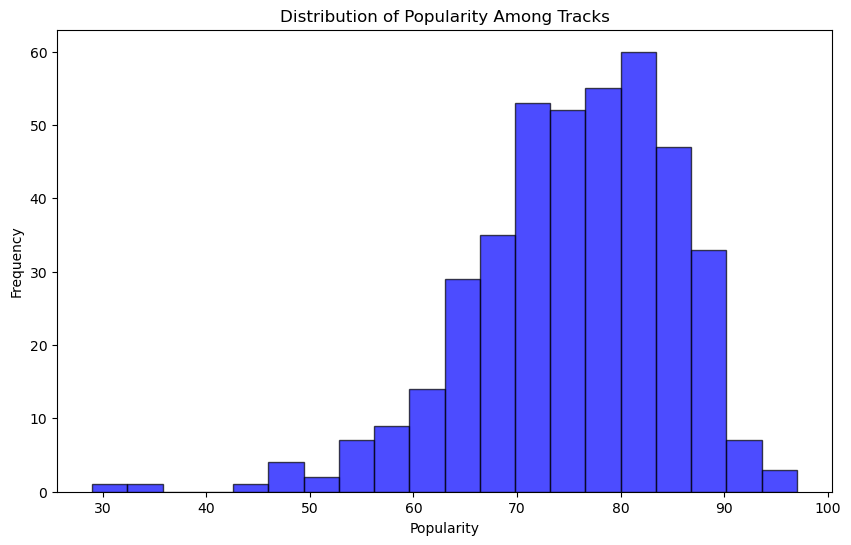

In [34]:

# Check for null values and drop them
df = df.dropna()

# Check for duplicate rows and drop them
df = df.drop_duplicates()

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df['Popularity'], bins=20, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity Among Tracks')
plt.show()


In [ ]:
# Q3 Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

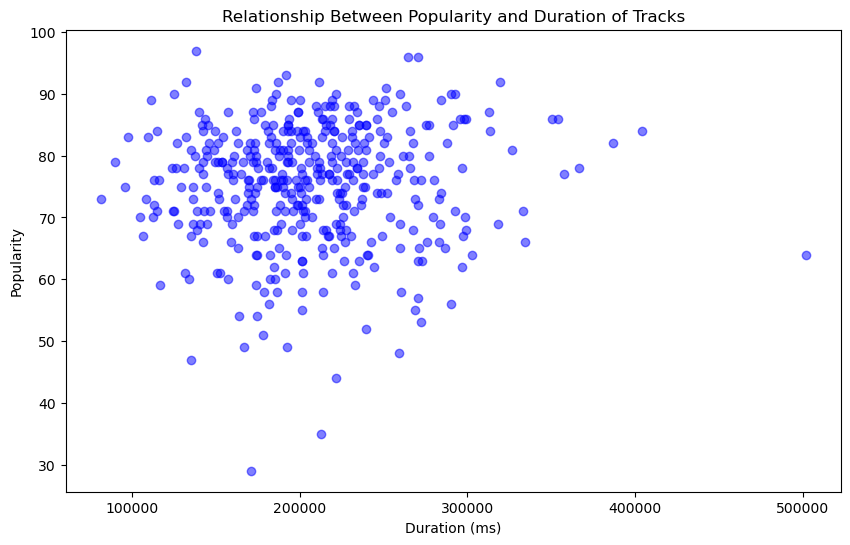

In [36]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Duration (ms)'], df['Popularity'], color='blue', alpha=0.5)
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Relationship Between Popularity and Duration of Tracks')
plt.show()


In [ ]:
#as popularity increase and slight increase in duration

In [ ]:
# Q4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

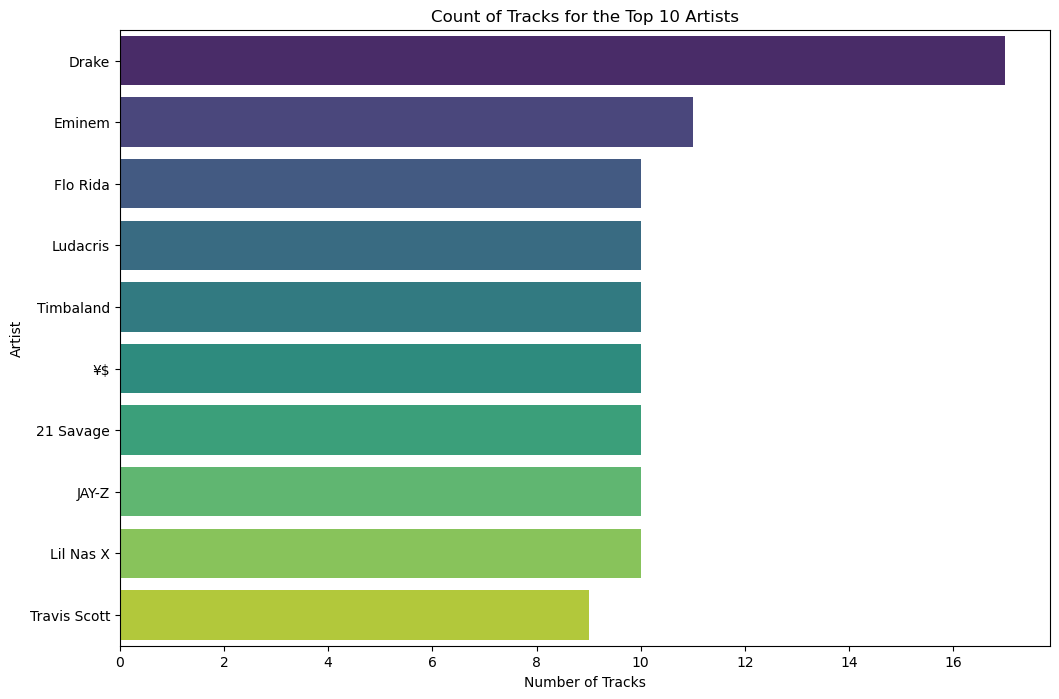

In [46]:

# Count the number of tracks for each artist
track_counts = df['Artist'].value_counts().reset_index()
track_counts.columns = ['Artist', 'Track Count']

# Get the top 10 artists
top_artists = track_counts.head(10)

# Plotting the countplot for the top 10 artists
plt.figure(figsize=(12, 8))
sns.barplot(y='Artist', x='Track Count', data=top_artists, hue='Artist', dodge=False, palette='viridis', legend=False)
plt.xlabel('Number of Tracks')
plt.ylabel('Artist')
plt.title('Count of Tracks for the Top 10 Artists')
plt.show()


In [ ]:
# Q5 What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each

In [48]:
# Sort the DataFrame by 'Popularity' in ascending order
least_popular_tracks = df.sort_values(by='Popularity').head(5)

# Select the relevant columns
least_popular_tracks = least_popular_tracks[['Artist', 'Track Name', 'Popularity']]

# Print the top 5 least popular tracks
print("\nTop 5 Least Popular Tracks:")
print(least_popular_tracks)



Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47
407     Wyclef Jean      911 (feat. Mary J. Blige)          48


In [ ]:
# Q6 Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [52]:

# Group by artist and calculate the average popularity
avg_popularity_by_artist = df.groupby('Artist')['Popularity'].mean().reset_index()

# Sort the artists by average popularity in descending order
top_artists = avg_popularity_by_artist.sort_values(by='Popularity', ascending=False).head(5)

# Print the top 5 most popular artists
print("\nTop 5 Most Popular Artists:")
print(top_artists)



Top 5 Most Popular Artists:
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   86.555556
114            ¥$   85.100000


In [54]:
# Q7 For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist

In [58]:
df[df["Artist"].isin(["Drake","Eminem","¥$","21 Savage","Flo Rida"])]["Track Name"]# Initialize an empty list to store the results
most_popular_tracks = []

# Loop through the top 5 artists and find their most popular track
for artist in top_artists['Artist']:
    # Filter the DataFrame for the current artist
    artist_tracks = df[df['Artist'] == artist]

    # Find the most popular track for the current artist
    most_popular_track = artist_tracks.sort_values(by='Popularity', ascending=False).iloc[0]

    # Append the result to the list
    most_popular_tracks.append({
        'Artist': artist,
        'Track Name': most_popular_track['Track Name'],
        'Popularity': most_popular_track['Popularity']
    })

# Convert the list to a DataFrame
most_popular_tracks_df = pd.DataFrame(most_popular_tracks)

# Print the most popular tracks for the top 5 artists
print("\nMost Popular Tracks for the Top 5 Artists:")
print(most_popular_tracks_df)



Most Popular Tracks for the Top 5 Artists:
         Artist                    Track Name  Popularity
0         cassö                         Prada          92
1        Trueno  Mamichula - con Nicki Nicole          89
2  David Guetta            Baby Don't Hurt Me          87
3  Travis Scott    FE!N (feat. Playboi Carti)          93
4            ¥$                      CARNIVAL          96


In [ ]:
# Q8 Visualize relationships between multiple numerical variables simultaneously using a pair plot

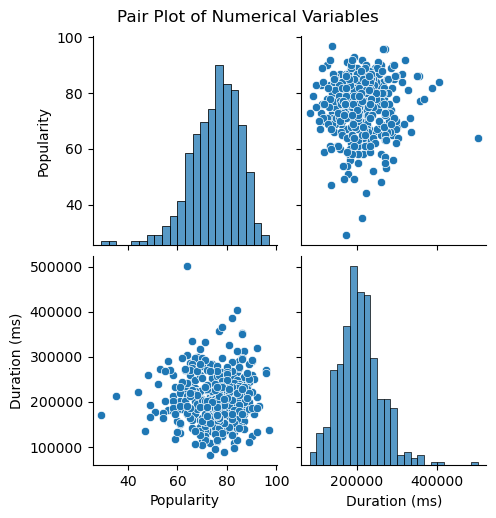

In [60]:
# Select numerical columns for the pair plot
numerical_columns = ['Popularity', 'Duration (ms)']

# Create the pair plot
sns.pairplot(df[numerical_columns])
plt.suptitle('Pair Plot of Numerical Variables', y=1.02)
plt.show()


In [ ]:
# Q9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

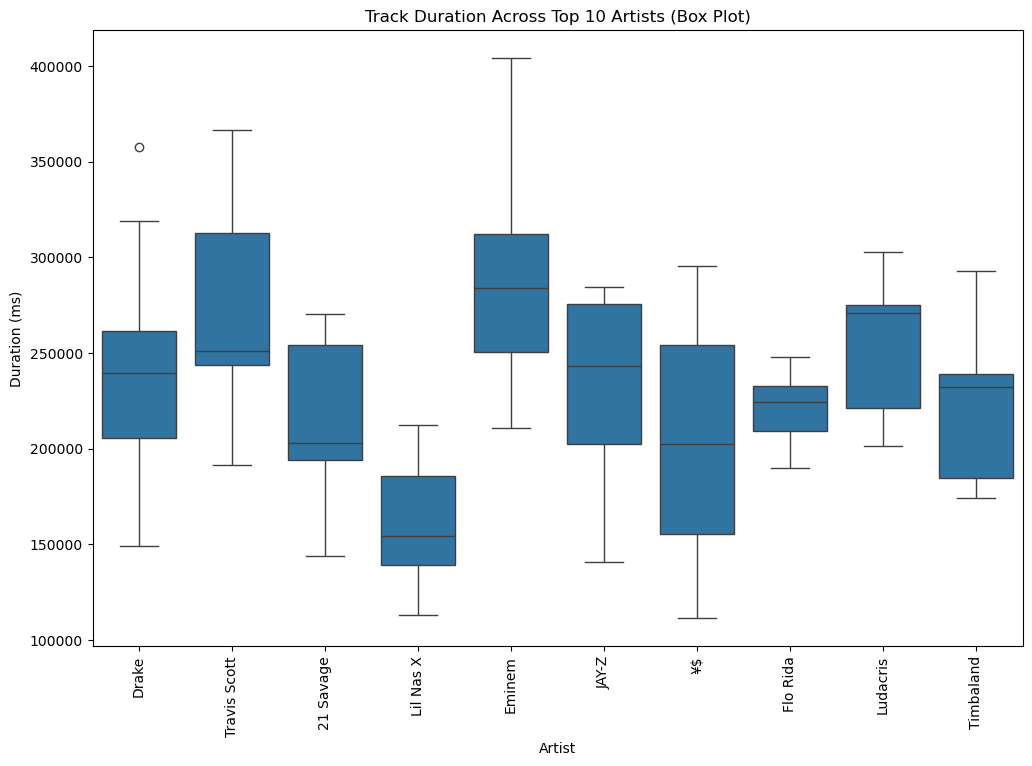

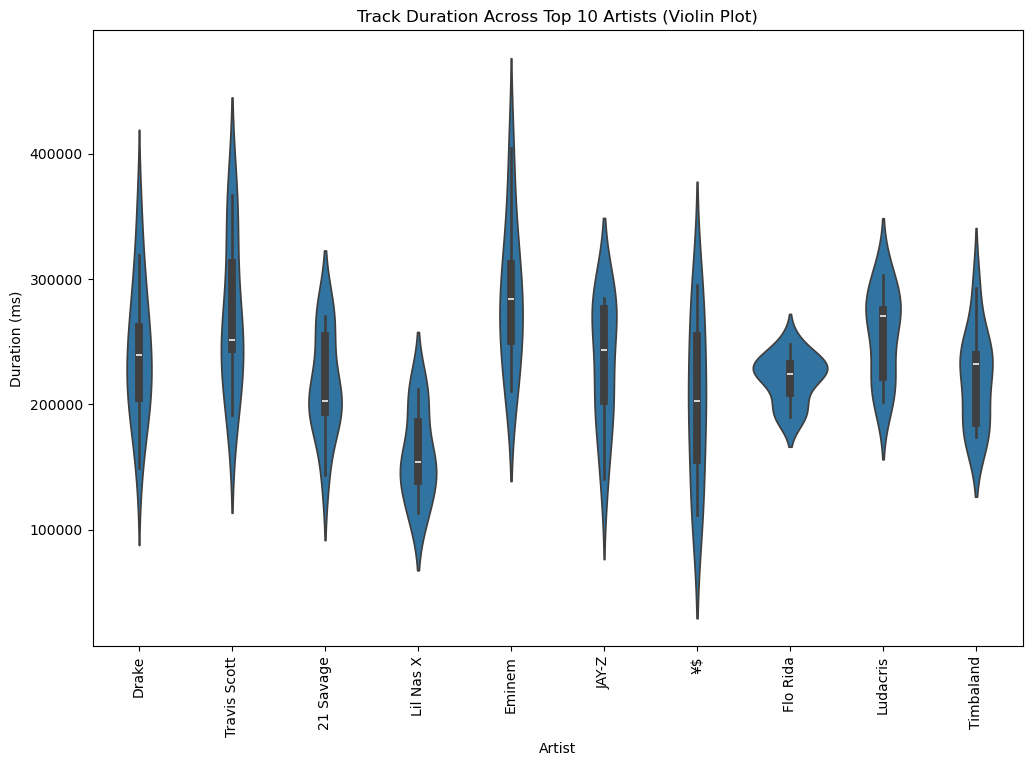

In [66]:
# Count the number of tracks for each artist
track_counts = df['Artist'].value_counts().reset_index()
track_counts.columns = ['Artist', 'Track Count']

# Get the top 10 artists
top_artists = track_counts.head(10)['Artist']

# Filter the DataFrame for the top 10 artists
df_top_artists = df[df['Artist'].isin(top_artists)]

# Plotting the box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x='Artist', y='Duration (ms)', data=df_top_artists)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Across Top 10 Artists (Box Plot)')
plt.xticks(rotation=90)
plt.show()

# Plotting the violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Duration (ms)', data=df_top_artists)
plt.xlabel('Artist')
plt.ylabel('Duration (ms)')
plt.title('Track Duration Across Top 10 Artists (Violin Plot)')
plt.xticks(rotation=90)
plt.show()


In [ ]:
# Q10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot

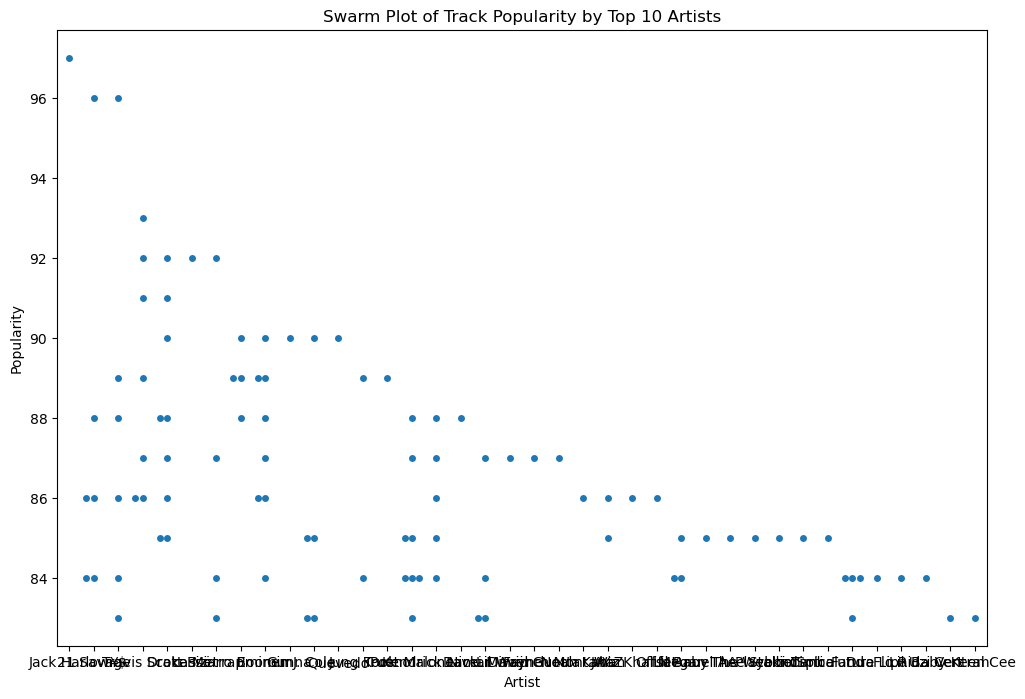

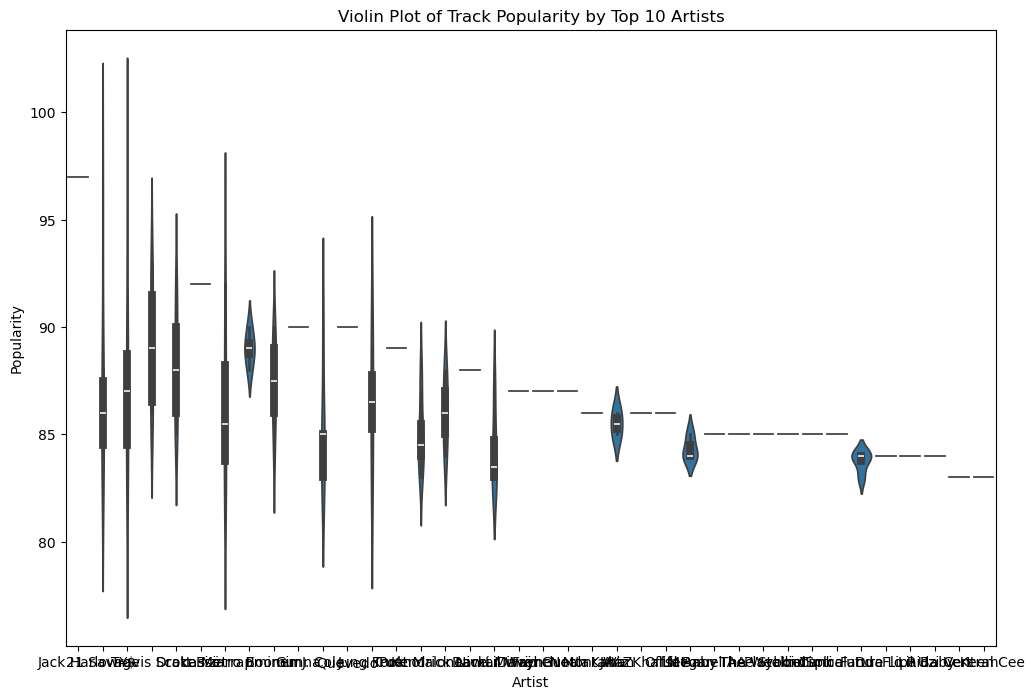

In [86]:
# because of this error
# C:\Users\adven\anaconda3\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 17.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
#  warnings.warn(msg, UserWarning)


# Filter top 10 artists based on popularity 
top_10_artists = df.nlargest(100, 'Popularity')

# Swarm plot with smaller markers
plt.figure(figsize=(12, 8))
sns.swarmplot(x='Artist', y='Popularity', data=top_10_artists, size=5)
plt.title('Swarm Plot of Track Popularity by Top 10 Artists')
plt.show()

# Violin plot
plt.figure(figsize=(12, 8))
sns.violinplot(x='Artist', y='Popularity', data=top_10_artists)
plt.title('Violin Plot of Track Popularity by Top 10 Artists')
plt.show()


In [76]:
# using strip plot for 

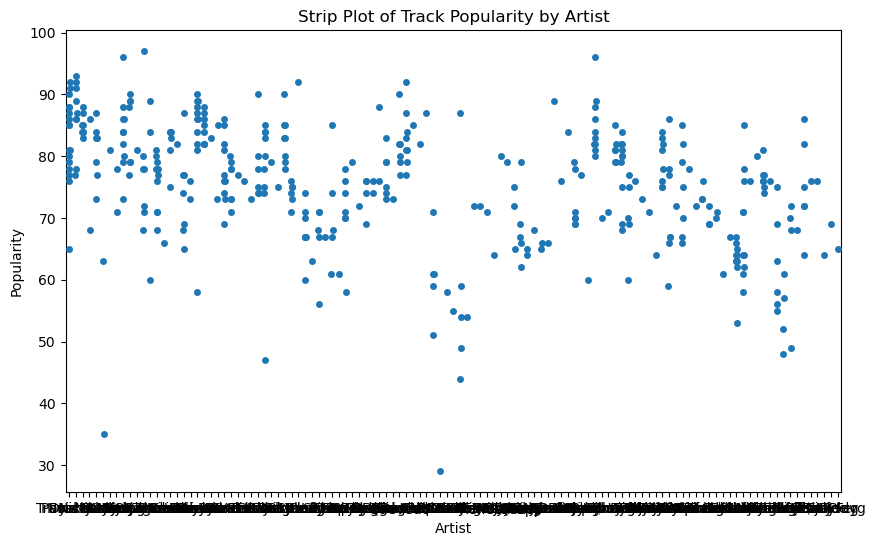

In [78]:

# Strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='Artist', y='Popularity', data=df)
plt.title('Strip Plot of Track Popularity by Artist')
plt.show()
